# Worksheet 3 - Scientific Visualization MVE080/MMG640
## Uncertainty and geospatial data

Name: _Axel Eiman_

This is the third worksheet in the course *Scientific Visualization*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualizations using plotnine.
Once you're finished with all the tasks, export this document as an HTML-file and upload it in Canvas.
You are encouraged to discuss problems and solutions with your fellow students (in the class-room but also on CampusWire), but each student must solve all tasks by themselves and hand-in their own report.
Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. Later on you can also include $\LaTeX$ in your Markdown cells.

The below loads the packages required for this homework.

In [55]:
import numpy as np
import pandas as pd
import geopandas as gpd
from plotnine import *

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Task 1

Read Chapter 15, 16 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1

During Lecture 5 we visualized uncertainty for point estimates using i) graded error-bars and ii) fuzziness (slide 6). Briefly describe when each kind of visual is suitable.

### Answer 1.1
Graded error bars are useful for clearly communicating the actual level of uncertainty, as you can show definite limits for 90 % certainty range for example. Fuzziness is suitable for situations where the exact level of uncertainty is not as important, but you want to focus on reminding the audience that there is an uncertainty as it is gives a very visual sense. 

### Question 1.2

Another way to visualize uncertainty is a **Hypothetical outcome plots** (Chapter 16 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/)). Briefly describe the key features of such a visual.

### Answer 1.2
Hypothetical outcome plots avoid the problem of the deterministic construal error by cycling through several different plots that are equally likely but different. Basically they show a series of possible individual outcomes that give an intuitive sense of what outcomes can be expected.

### Question 1.3

Often when doing regression (fitting a curve to data) we want to do use the regression model to make predictions. What is important to think about when visualizing model predictions?

### Answer 1.3
It is important to emphasize the uncertainty of the model predictions. This can be done using a confidence band around the model curve, with one or more levels. With this it is easier to comprehend that the data might support alternative trend curves than the single example the model presents.

### Question 1.4

As the earth is not flat (and neither a [Möbius strip](https://en.wikipedia.org/wiki/M%C3%B6bius_strip)) when working with 2-dimensional maps we have to use a projection. Describe one scenario where it would not be suitable to use the Mercator's projection.

### Answer 1.4
The Mercator projection is not suitable to use for maps of large areas of the globe, especially near the poles as the distortions become more severe further north.

### Question 1.5

A common form of visualization for maps is the Choropleth map (e.g slide 17 lecture 5). Briefly discuss two important aspects to consider when creating a choropleth map. 

### Answer 1.5
It is important to choose a good color scale that fits the medium the visualization is to appear on. It is also important to have appropriate granularity in the map, as larger areas can be percieved to have larger effect. Larger areas representing something like population density may give the impression that the entire area is densely populated, when really it may only be a certain city in a part of the area that brings the value up high.

## Uncertainty  

For this part reading chapter 16 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 2.1

Coffee is undoubtedly a popular beverage (albeit inferior to tea :). On Canvas I have uploaded a dataset with ratings for coffee beans from six different countries. 

Here we are interested in identifying which country on average has the best quality beans. Create two plots, where in i) you plot the mean ($\mu$) and standard deviation for each country (using errorbars), and ii) where you plot the mean and standard error of the mean estimate. Briefly discuss the drawbacks with error-bars. 

As a reminder. For country $j$ with coffee ratings $x^{(j)}_1, \ldots, x^{(j)}_{n_j}$ the sample mean is given by 

$$
\hat{\mu}^{(j)} = \sum_{i = 1}^{n_j} x_i^{(j)},
$$

sample standard deviation by

$$
\hat{\sigma}^{(j)} = \sqrt{\frac{1}{n - 1} \sum_{i = 1}^{n_j} (x_i^{(j)} - \hat{\mu}^{(j)})^2},
$$

and sample standard error for $\hat{\mu}^{(j)}$

$$
\hat{\sigma}_{\hat{\mu}^{(j)}} = \frac{\hat{\sigma}^{(j)}}{\sqrt{n}}
$$

and a confidence interval with confidence level $1 - \alpha$ is given by;

$$
\hat{\mu}^{(j)} \pm t_{n-1}(1 - \alpha / 2) \hat{\sigma}_{\hat{\mu}^{(j)}}
$$

where $t_{n-1}$ is the t-distribution with $n-1$ degree of freedom. For confidence level $1 - \alpha=0.95$ and $n = 30$ we have that $t_{29}(1 - 0.025) \approx 2.05$.

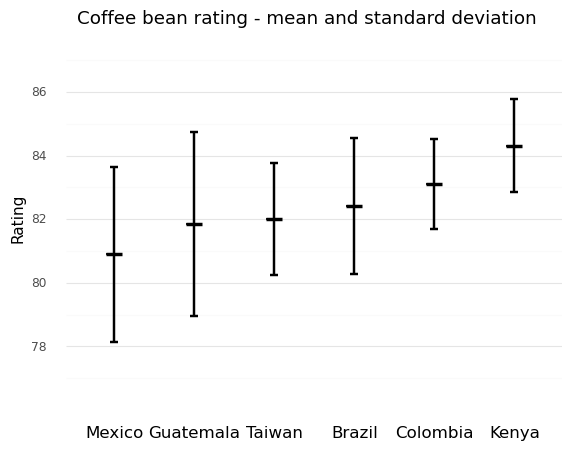

<ggplot: (90270472253)>

In [56]:
# Insert code here for visual 1
# Remember to print the visual 
# Plot the mean and std for each country

coffee = pd.read_csv('Coffee_tidy.csv')

countries = coffee['country_of_origin'].unique()
means = []
stds = []
stes = []

for id, country in enumerate(countries):
    pts = coffee[coffee['country_of_origin'] == country]['total_cup_points']
    
    means.append(pts.mean())
    stds.append(pts.std())
    stes.append(pts.std()/np.sqrt(len(coffee[coffee['country_of_origin'] == country])))

stats = pd.DataFrame({
    'Country': pd.Categorical(countries, categories=countries),
    'Mean': means,
    'Std': stds,
    'Ste': stes
})

stats['Std_lo'] = stats['Mean'] - stats['Std']
stats['Std_hi'] = stats['Mean'] + stats['Std']

stats = stats.sort_values('Mean', ignore_index=True)

p = (ggplot(stats, aes(x='Country', ymax='Mean', ymin='Mean'))
    + geom_errorbar(aes(ymin='Std_lo', ymax='Std_hi'), width=0.1, size=1.0)
    + scale_y_continuous(expand=(0.0, 2.0))
    + scale_x_discrete(limits=stats['Country'])
    + geom_crossbar(aes(y = "Mean", ymin = "Mean", ymax = "Mean"), width=0.2, size=0.7)
    + theme_minimal()
    + labs(y='Rating', title='Coffee bean rating - mean and standard deviation')
    + theme(panel_grid_major_x=element_blank(),
            axis_text_x = element_text(color="black", size=12),
            axis_title_x=element_blank()
            )
)

p

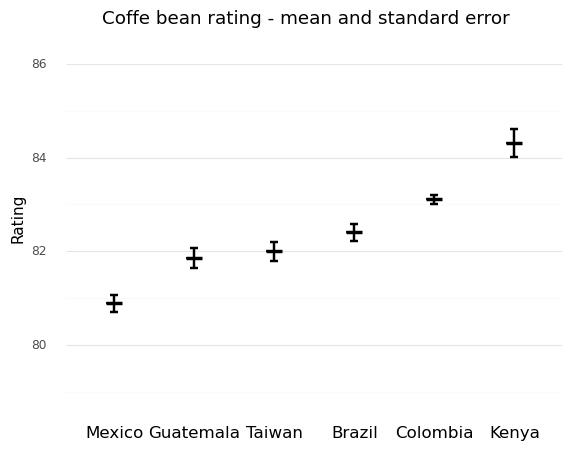

<ggplot: (90270465244)>

In [57]:
# Insert code here for visual 2
# Remember to print the visual 
# Plot the mean and the standard error for the mean estimate

stats['Ste_lo'] = stats['Mean'] - stats['Ste']
stats['Ste_hi'] = stats['Mean'] + stats['Ste']

p = (ggplot(stats, aes(x='Country', ymax='Mean', ymin='Mean'))
    + geom_errorbar(aes(ymin='Ste_lo', ymax='Ste_hi'), width=0.1, size=1.0)
    + scale_y_continuous(expand=(0.0, 2.0))
    + scale_x_discrete(limits=stats['Country'])
    + geom_crossbar(aes(y = "Mean", ymin = "Mean", ymax = "Mean"), width=0.2, size=0.7)
    + theme_minimal()
    + labs(y='Rating', title='Coffe bean rating - mean and standard error')
    + theme(panel_grid_major_x=element_blank(),
            axis_text_x = element_text(color="black", size=12),
            axis_title_x=element_blank()
            )
)

p


*Insert brief discussion*

### Question 2.2

Now using the coffee dataset visualize the uncertainty in the mean estimate using i) graded error-bars (here plot confidence intervals with 80%, 90% and 99% confidence) and ii) fuzzy error bars (as in slide 6 in Lecture 5).

In [58]:
# Insert code here for visual 1
# Remember to print the visual 

stats['Ste_lo'] = stats['Mean'] - stats['Ste']
stats['Ste_hi'] = stats['Mean'] + stats['Ste']

pop_mean = coffee['total_cup_points'].mean()

ns = coffee['country_of_origin'].value_counts()
stats['n'] = [ns['Mexico'], ns['Guatemala'], ns['Taiwan'], ns['Brazil'], ns['Colombia'], ns['Kenya']]
stats = stats.append([stats, stats])

C:\Users\ackee\AppData\Local\Temp\ipykernel_2280\4284178749.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


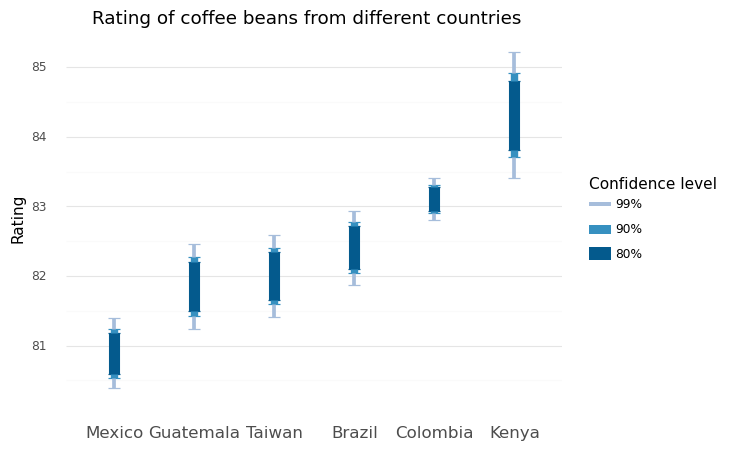

<ggplot: (90268832537)>

In [73]:

# print(stats['n'])
# stats['CI_percent'] = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99]
stats['CI_percent'] = ["80%", "80%", "80%", "80%", "80%", "80%", "90%", "90%", "90%", "90%", "90%", "90%", "99%", "99%", "99%", "99%", "99%", "99%"]
tvals = [1.6514, 1.6534, 1.6657, 1.6566, 1.6533, 1.7109, 
        1.9701, 1.9732, 1.9925, 1.9782, 1.9731, 2.0639, 
        2.8338, 2.8421, 2.8936, 2.8554, 2.8417, 3.0905]

stats['CI_low'] = stats['Mean'] - np.array(tvals)*stats['Ste']
stats['CI_high'] = stats['Mean'] + np.array(tvals)*stats['Ste']

stats = stats.assign(CI_percent = pd.Categorical(stats["CI_percent"], 
                     categories=["99%", "90%", "80%"]))

p = (ggplot(stats, aes(x = "Country")) 
  + geom_errorbar(aes(ymin = "CI_low", ymax = "CI_high", color = "CI_percent"), width=0.15)
  + geom_errorbar(aes(ymin = "CI_low", ymax = "CI_high", size = "CI_percent", color="CI_percent", width=0.0))
  + scale_color_manual(values = ["#a6bddb", "#3690c0", "#045a8d"], name = "Confidence level")
  + scale_size_manual(values = [1.5, 3.0, 4.5], name = "Confidence level")
  + scale_x_discrete(limits=stats['Country'].unique())
  + labs(x = "", y = "Rating", title = "Rating of coffee beans from different countries")
  + theme_minimal()
  + theme(panel_grid_major_x=element_blank(),
          axis_text_x = element_text(size=12))
)
p


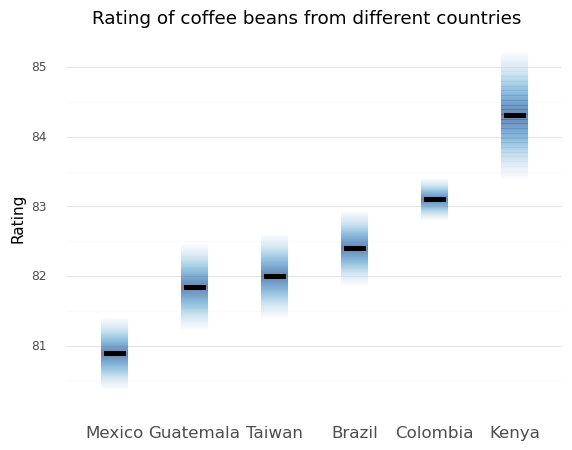

<ggplot: (90267206888)>

In [76]:
# Insert code here for visual 2
# Remember to print the visual 


data_fuzzy_tmp = stats.query("CI_percent == '99%'")

line_color = np.concatenate([np.linspace(0, 50, 50), np.linspace(50, 0, 50)])
data_fuzzy = pd.DataFrame()

for i in range(data_fuzzy_tmp.shape[0]):
    val_min, val_max = data_fuzzy_tmp["CI_low"].values[i], data_fuzzy_tmp["CI_high"].values[i]
    df_tmp = pd.DataFrame({"val_line" : np.linspace(val_min, val_max, 100), 
                        "color_line" : line_color}) 
    df_tmp["Country"] = data_fuzzy_tmp["Country"].values[i]
    data_fuzzy = pd.concat([data_fuzzy, df_tmp])

p = (ggplot(data_fuzzy, aes("Country", "val_line"))
    + geom_line(aes(color="color_line"), size=11.0, alpha=0.7)
    + geom_crossbar(data=stats, mapping=aes(y = "Mean", ymin = "Mean", ymax = "Mean"), width=0.26, size=1.0)
    + scale_color_cmap("Blues")
    + scale_x_discrete(limits=stats['Country'].unique())
    + labs(x = "", y = "Rating", title = "Rating of coffee beans from different countries")
    + theme_minimal()
    + theme(legend_position="none")
    + theme(panel_grid_major_x=element_blank(),
          axis_text_x = element_text(size=12)))
p

### Question 2.3

Frequency graphs are a powerful tool for visualizing probabilities. On Canvas I have uploaded an image of such a graph, please recreate it (you do not have to recreate the colors perfectly). The figure might look strange when rendered in Jupyter (then it is better to save it to disk and see how it looks like),

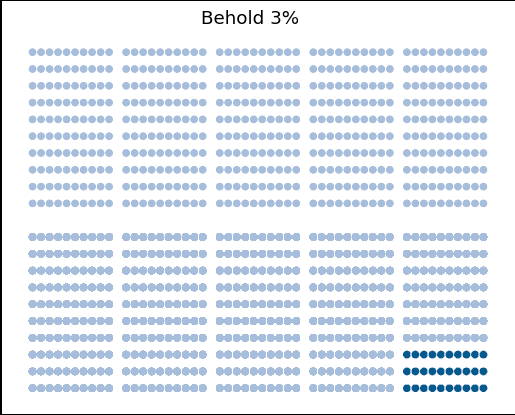

<ggplot: (90266810998)>

In [136]:
# Insert code here 
# Remember to print the visual 

x = np.linspace(0, 0.9, 10)
y = np.linspace(0, 0.9, 10)
dist = 0.1
w = 0.9

for i in range(1,5):
    x = np.append(x, np.linspace(i + i*dist, i+w+dist*i, 10)) #(i+dist*i, i+1+dist*i, 10)
    y = np.append(y, y)

x = np.append(x, x)
y = np.append(y, np.linspace(1+dist, 1+w+dist, 10))

xx,  yy = np.meshgrid(x, y)


grid = pd.DataFrame({
    'x':xx.flatten(),
    'y':yy.flatten()
})

grid['highlight'] = 'No'

grid_hi = grid.query('x > 4.3 and y < 0.3')
colors = ["#a6bddb", "#3690c0", "#045a8d"]
p = (ggplot(grid, aes(x='x', y='y'))
+ geom_point(size=2, color=colors[0])
+ geom_point(data=grid_hi, color=colors[2])
+ theme_minimal()
+ labs(title='Behold 3%')
+ theme(
    axis_text=element_blank(),
    axis_title=element_blank(),
    panel_grid=element_blank(),
    plot_background= element_rect(fill='white')
)
)
p

## Geospatial data  

For this part reading chapter 15 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help. You need to have **geopandas** installed for this part (you should be able to install it via the Anaconda navigator).

### Question 3.1

Let us take a closer look at Starbucks. Produce two visuals where i) you use dots and ii) where you use colors (here you can represent countries without Starbucks as white) which show the number of Starbucks stores in different Asian countries. See code below for how to get the Asian map.

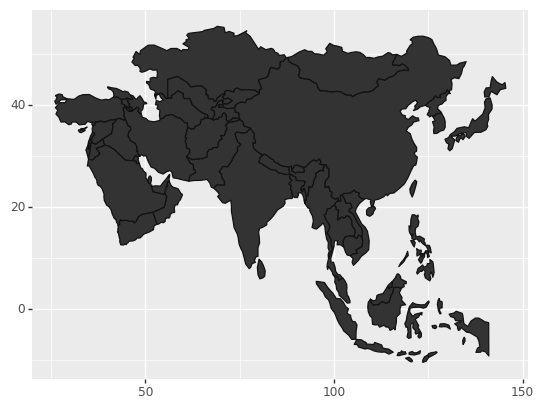

<ggplot: (90270665271)>

In [62]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
asia = world[world["continent"] == "Asia"]

# data_plot = asia.merge(starbucks_stores, left_on="iso_a3", right_on="iso_a3") will give you a dataset you can work with

(ggplot(asia)
    + geom_map())

In [63]:
# Insert code here for visual 1
# Remember to print the visual 

In [64]:
# Insert code here for visual 1
# Remember to print the visual 

## Question 3.2

On Canvas I have uploaded two datasets with percentage of a countries surface that is covered by forests in 1990 and 2019. Create a visual which clearly shows how forest coverage has changed between 1970 and 2019.

See code below for how to get the world map (with an appropriate projection).

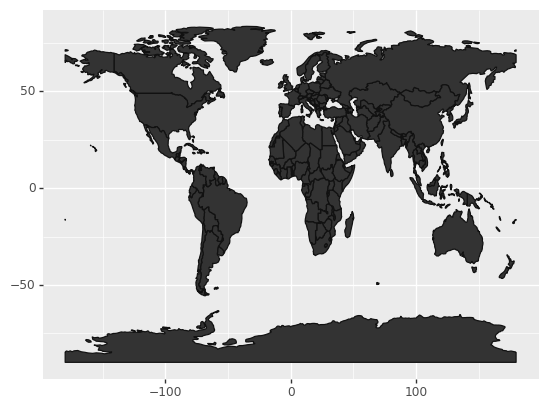

<ggplot: (90271900106)>

In [65]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# data_plot = asia.merge(starbucks_stores, left_on="iso_a3", right_on="iso_a3") will give you a dataset you can work with

(ggplot(world)
    + geom_map())

In [66]:
# Insert code here 
# Remember to print the visual 